In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

# dataset
k = 3
max_steps = 100
data, origin_label = make_blobs(n_samples=500,centers=k-2)

cm = plt.cm.get_cmap("viridis")
my_cmap = cm(np.linspace(0,1,k))
# Set alpha
my_cmap[:, -1] = 0.3
# Create new colormap
my_cmap = ListedColormap(my_cmap)

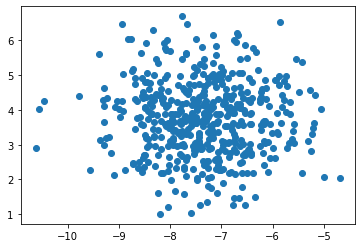

In [3]:
plt.scatter(data[:,0],data[:,1])

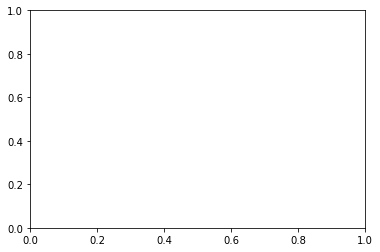

In [4]:
labels = np.zeros([max_steps,data.shape[0]], dtype = np.float64)
distance = np.zeros([data.shape[0],k], dtype = np.float64)
centers = np.zeros([max_steps+1,k,data.shape[1]], dtype = np.float64)

fig, ax = plt.subplots()

In [5]:
# random choose center
centers[0] = data[ np.random.randint(data.shape[0],size=k) ]
print(centers[0])

[[6.23210995 8.78395629]
 [4.9409654  9.24615903]
 [6.04950725 7.84948573]]


In [6]:
for i in range(max_steps):
    # calculate distance
    for j, c in enumerate(centers[i]):
        distance[:,j] = np.linalg.norm(data - c, axis = 1)
    # assign labels
    labels[i] = np.argmin(distance, axis=1)
    # re-calculate centers
    for j in range(k):
        centers[i+1,j] = np.mean(data[labels[i] == j], axis = 0)
    

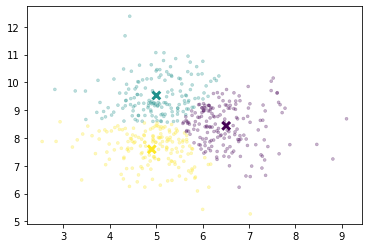

In [7]:
plt.scatter(data[:,0],data[:,1], c=labels[max_steps-1], cmap = my_cmap,marker = '.', lw=0.5)
plt.scatter(centers[max_steps,:,0],centers[max_steps,:,1], c = range(k), cmap = "viridis",  marker='x', lw=3,s=60)

In [8]:

scatter_0 = ax.scatter(data[:,0],data[:,1], c=labels[0], cmap = my_cmap,marker = '.', lw=0.5)
scatter_1 = ax.scatter(centers[0,:,0],centers[0,:,1], c = range(k), cmap = "viridis",  marker='x', lw=3,s=60)
 

def update(i):
    #print(i,type(data),type(centers[i+1]))
    #offset = np.concatenate([data,centers[i+1]])
    scatter_0.set_array(labels[i])
    scatter_1.set_offsets(centers[i+1])
    ax.set_title(f'Step: {i}')

In [ ]:

ani = animation.FuncAnimation(fig, update, frames=int(max_steps),interval=100)

writer = animation.FFMpegWriter(
     fps=30, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4")